# Arizona Bike Store Sales and Customer Analysis

Management would like to analyze their sales and customer data to improve marketing, customer relationship and revenue.

They need answers to the following questions:
1. What year/month generated the most revenue, so they can replicate campaigns and other factors that led to high sales.
2. What products are selling the most in volume and what is their comparison to profits, so they can increase profit margins for high selling volumes with low profits.
3. Which customers are in the bottom 25% based on sales, so they can improve on follow up and email campaigns to those customers.
4. Find out which product pairs are customer buying the most, so they could include a "Buy Also" in their online campaigns.

### WorkFlow
1. Import and clean the data
2. Analyze and plot the data (answer questions needed)

## 1. Import and clean the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

### Sales data

In [2]:
# import and join sales data from different years

# create empty dataframe
df_sales = pd.DataFrame()

# retrieve files in sales folder and append to the dataframe
files = [file for file in os.listdir("dataset/Fact_Sales/")]
for file in files:
    sales_data = pd.read_csv("dataset/Fact_Sales/"+file)
    df_sales = pd.concat([df_sales, sales_data])
    
df_sales.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1
3,2020-01-01,2019-11-16,SO45081,338,26782,6,1,1
4,2020-01-02,2019-12-15,SO45083,312,14947,10,1,1


In [3]:
# check that data was concatenated for all years and standardize column name
df_sales["order_date"] = pd.to_datetime(df_sales["OrderDate"])
df_sales["order_date"].dt.year.unique()

array([2020, 2021, 2022], dtype=int64)

In [4]:
# check that headers were not included from concatenated dataframes
df_sales[df_sales["OrderDate"].str.contains('OrderDate', case=False)]

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,order_date


In [5]:
# check for null values in all columns
df_sales[df_sales.isna().any(axis=1)]

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,order_date


In [6]:
# check data types
df_sales.dtypes

OrderDate                object
StockDate                object
OrderNumber              object
ProductKey                int64
CustomerKey               int64
TerritoryKey              int64
OrderLineItem             int64
OrderQuantity             int64
order_date       datetime64[ns]
dtype: object

In [7]:
# convert columns to proper data types and standardize column name
df_sales["stock_date"] = pd.to_datetime(df_sales["StockDate"])

In [8]:
# drop old columns
df_sales = df_sales.drop(["OrderDate", "StockDate"], axis = 1)

In [9]:
# re-check data types
df_sales.dtypes

OrderNumber              object
ProductKey                int64
CustomerKey               int64
TerritoryKey              int64
OrderLineItem             int64
OrderQuantity             int64
order_date       datetime64[ns]
stock_date       datetime64[ns]
dtype: object

In [10]:
# standardize all other column names
df_sales.rename (columns ={"OrderNumber":"order_number", 
                          "ProductKey":"product_key", 
                          "CustomerKey":"customer_key", 
                          "TerritoryKey":"territory_key", 
                          "OrderLineItem":"orderline_item", 
                          "OrderQuantity":"order_quantity"}, inplace=True)

In [11]:
# explore changes
df_sales.head(3)

,order_number,product_key,customer_key,territory_key,orderline_item,order_quantity,order_date,stock_date
0,SO45080,332,14657,1,1,1,2020-01-01,2019-09-21
1,SO45079,312,29255,4,1,1,2020-01-01,2019-12-05
2,SO45082,350,11455,9,1,1,2020-01-01,2019-10-29


In [12]:
# rearrange columns
columns = ["order_date","stock_date","order_number","product_key","customer_key","territory_key","orderline_item","order_quantity"]
df_sales = df_sales[columns] 

In [13]:
# explore changes
df_sales.head(3)

,order_date,stock_date,order_number,product_key,customer_key,territory_key,orderline_item,order_quantity
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1


### Products data

In [14]:
# import products data
df_products = pd.read_csv("dataset/Dim_Products.csv")
df_products.head(3)

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000


In [15]:
# retrieve needed columns
df_products = df_products[["ProductKey", "ProductName", "ProductCost", "ProductPrice"]]
df_products.head(3)

,ProductKey,ProductName,ProductCost,ProductPrice
0,214,"Sport-100 Helmet, Red",13.0863,34.9900
1,215,"Sport-100 Helmet, Black",12.0278,33.6442
2,218,"Mountain Bike Socks, M",3.3963,9.5000


Note: you can standardize the column names if you choose, but we would use it for now

## 2. Analyze and Plot the data

We are now ready to answer the following questions

### 1. What year/month generated the most revenue?

In [16]:
# retrieve the year and month from order date
df_sales["year-month"] = df_sales["order_date"].dt.strftime("%Y-%m")

In [17]:
df_sales.head(3)

,order_date,stock_date,order_number,product_key,customer_key,territory_key,orderline_item,order_quantity,year-month
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1,2020-01
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-01
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1,2020-01


We need to sum up the revenue for each year-month, however we only have the order quantity in the sales df.
The product price is in the product df. We need to join the 2 dfs and calculate revenue.

In [18]:
# join dataframes
df_productsales = pd.merge(df_sales, df_products, how="left", left_on="product_key", right_on="ProductKey")

In [19]:
df_productsales.head(3)

,order_date,stock_date,order_number,product_key,customer_key,territory_key,orderline_item,order_quantity,year-month,ProductKey,ProductName,ProductCost,ProductPrice
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1,2020-01,332,"Road-650 Black, 58",413.1463,699.0982
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-01,312,"Road-150 Red, 48",2171.2942,3578.2700
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1,2020-01,350,"Mountain-100 Black, 44",1898.0944,3374.9900


In [20]:
# calculate revenue, costs and profit
df_productsales["revenue"] = df_productsales["order_quantity"] * df_productsales["ProductPrice"]
df_productsales["costs"] = df_productsales["order_quantity"] * df_productsales["ProductCost"]
df_productsales["profit"] = df_productsales["revenue"] - df_productsales["costs"]

In [21]:
df_productsales.head(3)

,order_date,stock_date,order_number,product_key,customer_key,territory_key,orderline_item,order_quantity,year-month,ProductKey,ProductName,ProductCost,ProductPrice,revenue,costs,profit
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1,2020-01,332,"Road-650 Black, 58",413.1463,699.0982,699.0982,413.1463,285.9519
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-01,312,"Road-150 Red, 48",2171.2942,3578.2700,3578.2700,2171.2942,1406.9758
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1,2020-01,350,"Mountain-100 Black, 44",1898.0944,3374.9900,3374.9900,1898.0944,1476.8956


In [22]:
# we would sum up revenue each year-month and sort by the highest revenue
df_yearmonth_sales = df_productsales.groupby("year-month").sum(["revenue","costs","profit"])[["revenue","costs","profit"]].sort_values(by="revenue",ascending=False)
df_yearmonth_sales.head(3)

,revenue,costs,profit
year-month,,,
2022-06,1.826987e+06,1.055410e+06,771577.2917
2022-05,1.768433e+06,1.017678e+06,750754.3352
2021-12,1.635309e+06,9.456246e+05,689684.2306


In [23]:
# set pandas to display decimals to 2 decimal places
pd.set_option("display.float_format",lambda x: "%.2f" % x)

#### The year-month with the most sales in revenue is June 2022 with $1,826,987.14

Lets plot the data for the top 10 year-months

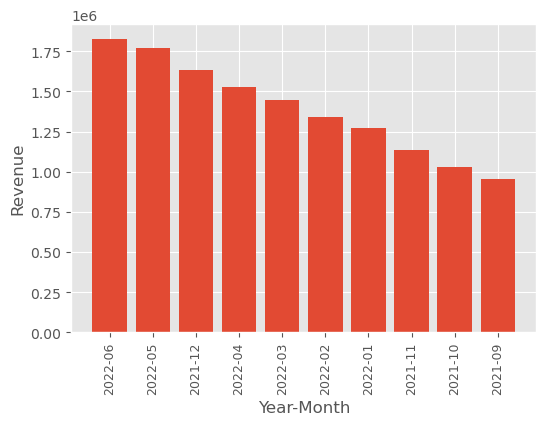

In [24]:
plt.figure(figsize=(6,4))
plt.style.use('ggplot') # using ggplot style
plt.bar(df_yearmonth_sales.index[:10], df_yearmonth_sales["revenue"][:10])
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(df_yearmonth_sales.index[:10], rotation='vertical', size=9)
plt.show()

### 2. What products are selling the most in volume and what is their comparison to profits?

In [25]:
# retrieve sales and product data
df_productsales.head(3)

,order_date,stock_date,order_number,product_key,customer_key,territory_key,orderline_item,order_quantity,year-month,ProductKey,ProductName,ProductCost,ProductPrice,revenue,costs,profit
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1,2020-01,332,"Road-650 Black, 58",413.15,699.10,699.10,413.15,285.95
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-01,312,"Road-150 Red, 48",2171.29,3578.27,3578.27,2171.29,1406.98
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1,2020-01,350,"Mountain-100 Black, 44",1898.09,3374.99,3374.99,1898.09,1476.90


Group products by quantity ordered and profit and display top 10 products

In [26]:
df_prodgroup = df_productsales.groupby('ProductName')[['order_quantity','profit']].agg('sum').sort_values(by='order_quantity', ascending=False)
df_prodgroup.head(10)

,order_quantity,profit
ProductName,,
Water Bottle - 30 oz.,7967,24886.52
Patch Kit/8 Patches,5898,8454.78
Mountain Tire Tube,5678,17736.37
Road Tire Tube,4327,10807.55
AWC Logo Cap,4151,12199.79
Fender Set - Mountain,3960,54487.62
Mountain Bottle Cage,3810,23826.60
Road Bottle Cage,3329,18734.61
Touring Tire Tube,2740,8558.94


#### The top selling product by volume is Water Bottle - 30 oz. with 7, 967 units sold and a profit of $24,886.52

We would use a combo chart to show the relationship between volume sold and profit made for the top 10 products

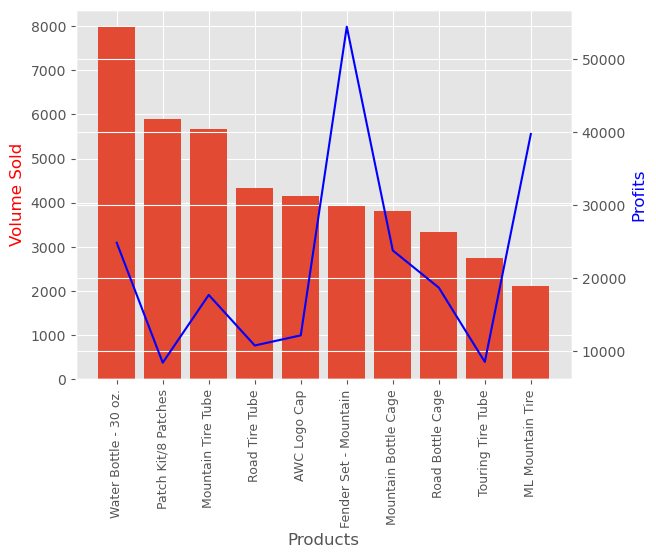

In [27]:
from matplotlib.ticker import FixedLocator, FixedFormatter

volume = df_prodgroup["order_quantity"][:10]
profits = df_prodgroup["profit"][:10]
products = df_prodgroup.index[:10]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, volume)
ax2.plot(products, profits, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Volume Sold', c='r')
ax2.set_ylabel('Profits', c='b')
ax1.set_xticks(products)
ax1.set_xticklabels(products, rotation='vertical', size=9)

plt.show()

#### From the chart, we can see Fender Set - Mountain has the highest profit but did not sell much in volume compared to other top 10 products, this may be due to its selling price and profit margins while Water bottle - 30oz sold the most volume but didnt make as much profit

### 3. Which customers are in the bottom 25%?

### Customer data

In [28]:
# import customers data
df_customers = pd.read_csv("dataset/Dim_Customers.csv", encoding = "latin-1") # using latin-1 encoding because dataset gave a 'utf-8' codec erroe
df_customers.head(3)

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,1966-04-08,M,M,jon24@adventure-works.com,90000.00,2.00,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,1965-05-14,S,M,eugene10@adventure-works.com,60000.00,3.00,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,1965-08-12,M,M,ruben35@adventure-works.com,60000.00,3.00,Bachelors,Professional,Y


In [29]:
# check for null values
df_customers[df_customers.isna().all(axis=1)]

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
18151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# drop rows where all values are null
df_customers = df_customers.dropna(how='all')

In [31]:
# check that null values are dropped
df_customers[df_customers.isna().all(axis=1)]

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner


In [32]:
# merge customer and sales data to get customer sales
df_customersales = pd.merge(df_customers,df_sales, how='left', left_on='CustomerKey', right_on='customer_key')
df_customersales

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [33]:
# received error, customer keys were not the same data type
df_customers.CustomerKey.dtype, df_sales.customer_key.dtype

(dtype('O'), dtype('int64'))

In [34]:
# show non numeric values in customer key
df_customers[~df_customers['CustomerKey'].str.isnumeric()]

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
18148,30---,m,NaN,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18149,30---,m,NaN,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18150,30---,m,NaN,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18152,Export date 20230101 14:59:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18153,Source AW_Cust_Master,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# get only numeric values in customer key and no null values
df_customers = df_customers[(df_customers['CustomerKey'].str.isnumeric()) & (df_customers['CustomerKey'].notna())]

In [36]:
# we would change customer key in customers df to integer
df_customers['CustomerKey'] = df_customers['CustomerKey'].astype('int64')

C:\Users\hp\AppData\Local\Temp\ipykernel_3508\3772549703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['CustomerKey'] = df_customers['CustomerKey'].astype('int64')


In [37]:
# rechecking data types
df_customers.CustomerKey.dtype, df_sales.customer_key.dtype

(dtype('int64'), dtype('int64'))

In [38]:
# merge customer and sales data again to get customer sales
df_customersales = pd.merge(df_customers,df_productsales, how='left', left_on='CustomerKey', right_on='customer_key')
df_customersales.head(3)

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,...,orderline_item,order_quantity,year-month,ProductKey,ProductName,ProductCost,ProductPrice,revenue,costs,profit
0,11000,MR.,JON,YANG,1966-04-08,M,M,jon24@adventure-works.com,90000.00,2.00,...,2.00,2.00,2021-07,485.00,Fender Set - Mountain,8.22,21.98,43.96,16.44,27.52
1,11000,MR.,JON,YANG,1966-04-08,M,M,jon24@adventure-works.com,90000.00,2.00,...,1.00,1.00,2021-07,352.00,"Mountain-200 Silver, 38",1117.86,2071.42,2071.42,1117.86,953.56
2,11000,MR.,JON,YANG,1966-04-08,M,M,jon24@adventure-works.com,90000.00,2.00,...,3.00,2.00,2021-11,530.00,Touring Tire Tube,1.87,4.99,9.98,3.73,6.25


In [39]:
# retrieve needed columns
df_groupcustomers  = df_customersales.groupby(['FirstName','LastName','Gender','EmailAddress'])['revenue'].sum().to_frame('revenue').reset_index().sort_values(by='revenue', ascending=False)
df_groupcustomers.head()

,FirstName,LastName,Gender,EmailAddress,revenue
12627,MAURICE,SHAN,M,maurice11@adventure-works.com,12407.95
8245,JANET,MUNOZ,F,janet12@adventure-works.com,12015.40
11473,LISA,CAI,F,lisa24@adventure-works.com,11330.45
11102,LACEY,ZHENG,F,lacey32@adventure-works.com,11085.75
9454,JORDAN,TURNER,M,jordan59@adventure-works.com,11022.40


In [40]:
# get the total number of customers
len(df_groupcustomers)

18018

In [41]:
import math
# calculate 25%
_25pct = 0.25 * len(df_groupcustomers)
_25pct = math.ceil(_25pct)
_25pct

4505

In [42]:
# slice the bottom 25%
df_bottom25customers = df_groupcustomers[-_25pct:]
df_bottom25customers

,FirstName,LastName,Gender,EmailAddress,revenue
7117,HALEY,COX,F,haley11@adventure-works.com,64.56
3609,CHLOE,HOWARD,F,chloe57@adventure-works.com,64.56
11271,LAUREN,RUSSELL,F,lauren66@adventure-works.com,64.56
11537,LOGAN,LOPEZ,M,logan46@adventure-works.com,64.56
6736,GEOFFREY,KAPOOR,M,geoffrey1@adventure-works.com,64.56
...,...,...,...,...,...
2625,BROOKE,HOWARD,F,brooke10@adventure-works.com,0.00
10569,KELLIE,ORTEGA,F,kellie19@adventure-works.com,0.00
15841,SETH,CARTER,M,seth37@adventure-works.com,0.00
15839,SETH,BUTLER,M,seth62@adventure-works.com,0.00


#### These are the customers in the bottom 25% by sales (with emails and gender).

In [43]:
df_bottom25customers.to_csv("bottom25pct_customers.csv")

Data can now be used for follow-ups and email campaigns

### 4. Which product pairs are customers buying the most?

In [44]:
df_productsales.head()

,order_date,stock_date,order_number,product_key,customer_key,territory_key,orderline_item,order_quantity,year-month,ProductKey,ProductName,ProductCost,ProductPrice,revenue,costs,profit
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1,2020-01,332,"Road-650 Black, 58",413.15,699.10,699.10,413.15,285.95
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-01,312,"Road-150 Red, 48",2171.29,3578.27,3578.27,2171.29,1406.98
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1,2020-01,350,"Mountain-100 Black, 44",1898.09,3374.99,3374.99,1898.09,1476.90
3,2020-01-01,2019-11-16,SO45081,338,26782,6,1,1,2020-01,338,"Road-650 Black, 44",413.15,699.10,699.10,413.15,285.95
4,2020-01-02,2019-12-15,SO45083,312,14947,10,1,1,2020-01,312,"Road-150 Red, 48",2171.29,3578.27,3578.27,2171.29,1406.98


In [45]:
# get duplicates order number, since we are on orderline
df_pairs = df_productsales[df_productsales['order_number'].duplicated(keep=False)][['order_number', 'ProductName']]
df_pairs.head()

,order_number,ProductName
4336,SO51176,"Road-250 Black, 58"
4337,SO51176,Road Bottle Cage
4339,SO51179,Road Tire Tube
4340,SO51179,"Road-250 Black, 52"
4341,SO51179,All-Purpose Bike Stand


In [46]:
# group products with same order number using transform
df_pairs['grouped_products'] =  df_pairs.groupby('order_number')['ProductName'].transform(lambda x: ",".join(x))
df_pairs.head()

,order_number,ProductName,grouped_products
4336,SO51176,"Road-250 Black, 58","Road-250 Black, 58,Road Bottle Cage"
4337,SO51176,Road Bottle Cage,"Road-250 Black, 58,Road Bottle Cage"
4339,SO51179,Road Tire Tube,"Road Tire Tube,Road-250 Black, 52,All-Purpose ..."
4340,SO51179,"Road-250 Black, 52","Road Tire Tube,Road-250 Black, 52,All-Purpose ..."
4341,SO51179,All-Purpose Bike Stand,"Road Tire Tube,Road-250 Black, 52,All-Purpose ..."


In [47]:
# drop duplicate rows
df_pairs = df_pairs[['order_number','grouped_products']].drop_duplicates()
df_pairs.head()

,order_number,grouped_products
4336,SO51176,"Road-250 Black, 58,Road Bottle Cage"
4339,SO51179,"Road Tire Tube,Road-250 Black, 52,All-Purpose ..."
4343,SO51185,"Touring Tire,Touring Tire Tube,Touring-3000 Ye..."
4346,SO51177,"Sport-100 Helmet, Black,Touring-2000 Blue, 46"
4348,SO51180,"Road Bottle Cage,Sport-100 Helmet, Red,Long-Sl..."


In [100]:
# We would import new libraries, intertools and collections to perform a count of pairs

from itertools import combinations
from collections import Counter

count = Counter()
product_list = df_pairs['grouped_products']

product_paired_2 = pd.DataFrame()

# count the combinations of 2pairs and update the counter
for row in product_list:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
# we would get the most common 50 pairs
for key, value in count.most_common(50):
    key = f'{key}'
    value = f'{value}'
    product_paired_2.loc[key, 'count_of_2_pairs'] = value

In [101]:
# dispaly results
product_paired_2.head()

,count_of_2_pairs
"('Sport-100 Helmet', ' Red')",2044
"('Sport-100 Helmet', ' Blue')",1948
"('Sport-100 Helmet', ' Black')",1883
"('Water Bottle - 30 oz.', 'Mountain Bottle Cage')",1257
"('Water Bottle - 30 oz.', 'Road Bottle Cage')",1173


In [102]:
# we would reset the index and rename the indexed column
product_paired_2 = product_paired_2.reset_index().rename(columns={'index':'product_2_pairs'})
product_paired_2.head()

,product_2_pairs,count_of_2_pairs
0,"('Sport-100 Helmet', ' Red')",2044
1,"('Sport-100 Helmet', ' Blue')",1948
2,"('Sport-100 Helmet', ' Black')",1883
3,"('Water Bottle - 30 oz.', 'Mountain Bottle Cage')",1257
4,"('Water Bottle - 30 oz.', 'Road Bottle Cage')",1173


In [103]:
# we would clean columns values
product_paired_2['product_2_pairs'] = product_paired_2['product_2_pairs'].apply(lambda x: str(x).split("(")[1])
product_paired_2['product_2_pairs'] = product_paired_2['product_2_pairs'].apply(lambda x: str(x).split(")")[0]) 
product_paired_2['product_2_pairs'] = product_paired_2['product_2_pairs'].str.replace("'","")

In [104]:
product_paired_2.head()

,product_2_pairs,count_of_2_pairs
0,"Sport-100 Helmet, Red",2044
1,"Sport-100 Helmet, Blue",1948
2,"Sport-100 Helmet, Black",1883
3,"Water Bottle - 30 oz., Mountain Bottle Cage",1257
4,"Water Bottle - 30 oz., Road Bottle Cage",1173


We can export to csv and send to marketing but lets add pairs of 3 to give them more insights

In [108]:
# we would copy the needed codes and modify

count = Counter()
product_list = df_pairs['grouped_products']

product_paired_3 = pd.DataFrame()

for row in product_list:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,3)))

for key, value in count.most_common(50):
    key = f'{key}'
    value = f'{value}'
    product_paired_3.loc[key, 'count_of_3_pairs'] = value

In [111]:
product_paired_3 = product_paired_3.reset_index().rename(columns={'index':'product_3_pairs'})
product_paired_3.head()

,product_3_pairs,count_of_3_pairs
0,"('Water Bottle - 30 oz.', 'Road Bottle Cage', ...",380
1,"('Mountain Tire Tube', 'Sport-100 Helmet', ' B...",359
2,"('Mountain Tire Tube', 'Sport-100 Helmet', ' R...",350
3,"('Mountain Tire Tube', 'Sport-100 Helmet', ' B...",348
4,"('Water Bottle - 30 oz.', 'Sport-100 Helmet', ...",321


In [112]:
# clean columns values
product_paired_3['product_3_pairs'] = product_paired_3['product_3_pairs'].apply(lambda x: str(x).split("(")[1])
product_paired_3['product_3_pairs'] = product_paired_3['product_3_pairs'].apply(lambda x: str(x).split(")")[0]) 
product_paired_3['product_3_pairs'] = product_paired_3['product_3_pairs'].str.replace("'","")

In [113]:
product_paired_3.head()

,product_3_pairs,count_of_3_pairs
0,"Water Bottle - 30 oz., Road Bottle Cage, Road-...",380
1,"Mountain Tire Tube, Sport-100 Helmet, Black",359
2,"Mountain Tire Tube, Sport-100 Helmet, Red",350
3,"Mountain Tire Tube, Sport-100 Helmet, Blue",348
4,"Water Bottle - 30 oz., Sport-100 Helmet, Red",321


In [115]:
# save to csv
product_paired_2.to_csv("product_paired_2.csv", index=False)
product_paired_3.to_csv("product_paired_3.csv", index=False)